## Read News Data (csv)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.getcwd()

'/home/frcloers/code/FrCloers/stock_news_pred/notebooks'

In [ ]:
df = pd.read_csv("stock_news_top_6_stocks")

In [ ]:
df = df.drop(columns  ="Unnamed: 0")

### read from GCP bucket

first add "gcloud config set project stock-news-pred" in the terminal

In [3]:
from google.cloud import storage
def get_news_data_from_gcp(nrows=10000, local=False, optimize=False, **kwargs):
    """method to get the training data (or a portion of it) from google cloud bucket"""
    # Add Client() here
    client = storage.Client()
    if local:
        path = "data/data_data_10Mill.csv"
    else:
        path = "gs://stock-news-pred-bucket/stock_news_top_6_stocks"
    df = pd.read_csv(path)#add nrows after if you want to select a specific number of row
    return df

In [4]:
df = get_news_data_from_gcp()

In [5]:
df = df.drop(columns  ="Unnamed: 0")

In [6]:
df.head()

,date,title,content,ticker
0,2020-11-10T20:35:50+00:00,Stocks mixed as tech sell-off continues,"Steve Sosnick, Interactive Brokers Chief Strat...",AAPL
1,2020-11-13T14:00:00+00:00,LinkedIn Co-founder: the number of ‘tech giant...,LinkedIn Co-founder Reid Hoffman joins 'Influe...,AAPL
2,2020-11-09T09:15:52+00:00,Apple Freezes New Business for Pegatron on Chi...,(Bloomberg) -- Apple Inc. suspended new busine...,AAPL
3,2020-11-03T01:17:24+00:00,Apple to Launch MacBooks With Own Chips Next Week,(Bloomberg) -- Apple Inc.’s 15-year relationsh...,AAPL
4,2020-11-11T16:18:37+00:00,Alibaba Singles’ Day Ends Strongly as Beijing ...,(Bloomberg) -- Alibaba Group Holding Ltd. post...,AAPL


In [7]:
len(df)

33595

### Some graphs about data

In [8]:
df["day"] = pd.to_datetime(df["date"]).dt.date

In [9]:
import matplotlib.pyplot as plt
news_count = df.groupby(by=["day", "ticker"]).count()["title"].unstack().fillna(0)
news_count

ticker,AAPL,AMZN,GOOGL,MSFT,NFLX,TSLA
day,,,,,,
2020-11-02,3.0,2.0,1.0,3.0,0.0,1.0
2020-11-03,1.0,0.0,1.0,0.0,0.0,1.0
2020-11-05,0.0,1.0,0.0,0.0,0.0,1.0
2020-11-06,0.0,3.0,2.0,1.0,0.0,1.0
2020-11-07,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-11-19,67.0,84.0,71.0,81.0,41.0,69.0
2021-11-20,8.0,17.0,9.0,10.0,6.0,17.0
2021-11-21,10.0,20.0,14.0,13.0,7.0,15.0


<AxesSubplot:xlabel='day'>

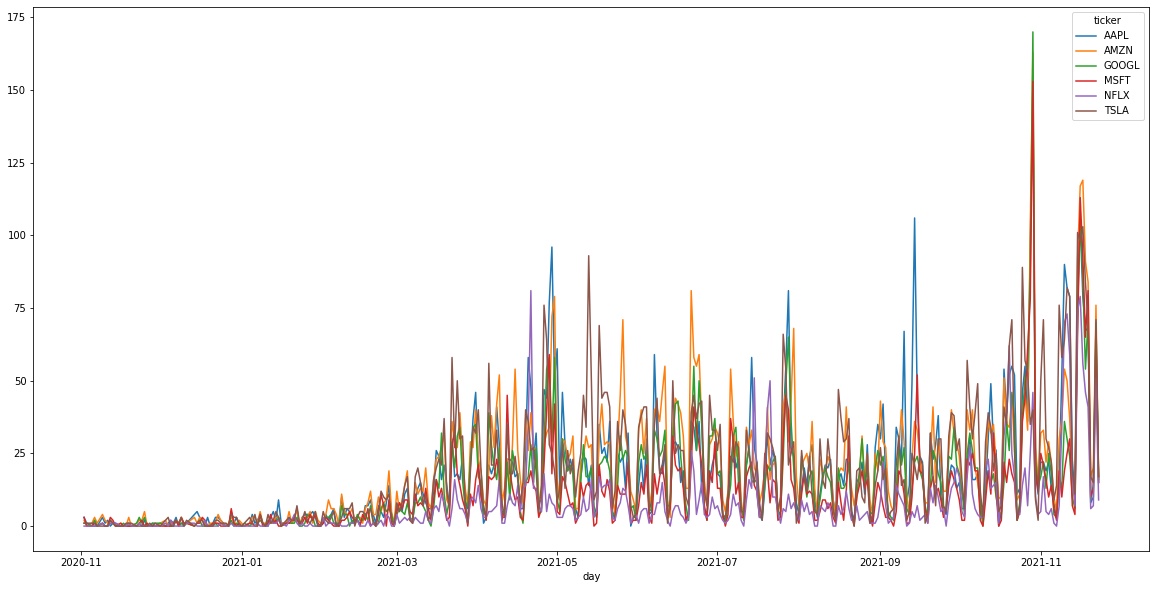

In [10]:
news_count.plot(kind="line", figsize=(20,10))

## Sentiment Analyzer 

### make sentiments with title

In [11]:
df.head()

,date,title,content,ticker,day
0,2020-11-10T20:35:50+00:00,Stocks mixed as tech sell-off continues,"Steve Sosnick, Interactive Brokers Chief Strat...",AAPL,2020-11-10
1,2020-11-13T14:00:00+00:00,LinkedIn Co-founder: the number of ‘tech giant...,LinkedIn Co-founder Reid Hoffman joins 'Influe...,AAPL,2020-11-13
2,2020-11-09T09:15:52+00:00,Apple Freezes New Business for Pegatron on Chi...,(Bloomberg) -- Apple Inc. suspended new busine...,AAPL,2020-11-09
3,2020-11-03T01:17:24+00:00,Apple to Launch MacBooks With Own Chips Next Week,(Bloomberg) -- Apple Inc.’s 15-year relationsh...,AAPL,2020-11-03
4,2020-11-11T16:18:37+00:00,Alibaba Singles’ Day Ends Strongly as Beijing ...,(Bloomberg) -- Alibaba Group Holding Ltd. post...,AAPL,2020-11-11


In [12]:
#first install pretrained sentiment analyzer flair
#!pip install flair

In [13]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')


2021-11-30 14:07:25.168074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-30 14:07:25.168233: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2021-11-30 14:07:37,275 loading file /home/frcloers/.flair/models/sentiment-en-mix-distillbert_4.pt


KeyboardInterrupt: 

In [ ]:
# an example to try flair out
sentence = Sentence('Flair is pretty neat!')
classifier.predict(sentence)
# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

In [ ]:
def classify_sentence(X):
    sentence = Sentence(X)
    classifier.predict(sentence)
    return sentence.labels

In [ ]:
#takes 30-40 min
df["sentiment"]=df["title"].apply(classify_sentence)

In [ ]:
# export data
df.to_csv("stock_news_sentiment_final.csv")

### Import data again

In [42]:
#import data
df = pd.read_csv("stock_news_sentiment_final.csv")

In [44]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])


In [60]:
df.tail()

,date,title,content,ticker,sentiment,sentiment_result
33590,2021-11-22T15:59:49+00:00,Fed Chair Powell renomination 'is good news fo...,Michael Arone of State Street Global Advisors ...,NFLX,[POSITIVE (0.9801)],NaN
33591,2021-11-22T18:41:00+00:00,Disney Stock Is Down. This Analyst Sees Stream...,Slowing subscriber growth at Disney+ worried i...,NFLX,[NEGATIVE (0.9902)],NaN
33592,2021-11-22T21:03:11+00:00,Netflix employee at the center of protests aga...,By Kanishka Singh\n\nNov 22 (Reuters) - A Netf...,NFLX,[NEGATIVE (0.9859)],NaN
33593,2021-11-22T17:31:00+00:00,Kevin Spacey Loses Arbitration Case Against ‘H...,"Under the terms of the arbitrator’s ruling, MR...",NFLX,[NEGATIVE (0.8938)],NaN
33594,2021-11-23T07:33:00+00:00,Two Netflix workers who complained about Dave ...,"Chappelle's ""The Closer"" first aired on Oct. 1...",NFLX,[NEGATIVE (0.9541)],NaN


### Construct new columns for aggregated sentiment result per day - preprocessing for model

In [23]:
#load df from getting sentiment step

In [185]:
#create a function to get out the boolean result per row 
def preprocess_sentiment(X):
    return X.split()[0][1:]

In [61]:
df["sentiment_result"] = df["sentiment"].apply(preprocess_sentiment)
df["sentiment_result"]

0        NEGATIVE
1        NEGATIVE
2        NEGATIVE
3        NEGATIVE
4        NEGATIVE
           ...   
33590    POSITIVE
33591    NEGATIVE
33592    NEGATIVE
33593    NEGATIVE
33594    NEGATIVE
Name: sentiment_result, Length: 33595, dtype: object

In [69]:
df["date"] = pd.to_datetime(df["date"]).dt.date

In [81]:
df = df.sort_values(by="date")

In [99]:
#create a new column positive
df["positive"] = df["sentiment_result"].apply(lambda X: 1 if X =="POSITIVE" else  0)

In [101]:
#create a new column negative
df["negative"] = df["sentiment_result"].apply(lambda X: 1 if X =="NEGATIVE" else  0)

In [113]:
df.head()

,date,title,content,ticker,sentiment,sentiment_result,positive,negative
6532,2020-11-02,"The Zacks Analyst Blog Highlights: Nintendo, A...","For Immediate Release\n\nChicago, IL – Novembe...",MSFT,[POSITIVE (0.945)],POSITIVE,1,0
16205,2020-11-02,Lockdowns Mean Christmas Comes Early for Amazon,"(Bloomberg Opinion) -- For many retailers, the...",AMZN,[NEGATIVE (0.5649)],NEGATIVE,0,1
23642,2020-11-02,Nidec To Build $2B Electric Vehicle Motor Fact...,Nidec Corporation (OTC: NJDCY) will build a $1...,TSLA,[POSITIVE (0.7748)],POSITIVE,1,0
16212,2020-11-02,Ambani Versus Bezos: A Fight or a Waiting Game?,(Bloomberg Opinion) -- A vanilla commercial di...,AMZN,[NEGATIVE (0.9458)],NEGATIVE,0,1
6534,2020-11-02,VirnetX Takes Another $503 Million Bite Out of...,VirnetX (NYSEMKT: VHC) continues to pile up co...,MSFT,[NEGATIVE (0.9906)],NEGATIVE,0,1
8,2020-11-02,"Dow Jones Jumps, Small Caps Lead As Trump Near...",The Dow Jones gained amid a broad rally as Don...,AAPL,[NEGATIVE (0.6919)],NEGATIVE,0,1
6533,2020-11-02,Why VirnetX Is Tumbling Today,Shares of VirnetX (NYSEMKT: VHC) were falling ...,MSFT,[NEGATIVE (0.9997)],NEGATIVE,0,1
10,2020-11-02,Why VirnetX Is Tumbling Today,Shares of VirnetX (NYSEMKT: VHC) were falling ...,AAPL,[NEGATIVE (0.9997)],NEGATIVE,0,1
11,2020-11-02,VirnetX Takes Another $503 Million Bite Out of...,VirnetX (NYSEMKT: VHC) continues to pile up co...,AAPL,[NEGATIVE (0.9906)],NEGATIVE,0,1
10778,2020-11-02,Ambani Versus Bezos: A Fight or a Waiting Game?,(Bloomberg Opinion) -- A vanilla commercial di...,GOOGL,[NEGATIVE (0.9458)],NEGATIVE,0,1


In [143]:
#group by per date and ticker
df_sentiment_count = df.groupby(by=["date", "ticker"]).agg(sum)

In [144]:
#reset index to have date per row
df_sentiment_count.reset_index(drop=False, inplace=True)

In [149]:
#create a new column to 
df_sentiment_count["majority"] = df_sentiment_count["positive"]-df_sentiment_count["negative"]

TypeError: '>' not supported between instances of 'datetime.date' and 'int'

In [151]:
#create the final sentiment label
df_sentiment_count["class_label"] = df_sentiment_count["majority"].apply(lambda x: 1 if x>0 else 0)
df_sentiment_count.drop(columns=["positive", "negative", "majority"], inplace=True)
df_sentiment_count

,date,ticker,class_label
0,2020-11-02,AAPL,0
1,2020-11-02,AMZN,0
2,2020-11-02,GOOGL,0
3,2020-11-02,MSFT,0
4,2020-11-02,TSLA,1
...,...,...,...
1997,2021-11-23,AMZN,0
1998,2021-11-23,GOOGL,0
1999,2021-11-23,MSFT,0
2000,2021-11-23,NFLX,0


In [186]:
#labels 0=negative and 1=positive
df_sentiment_count["class_label"].value_counts()

0    1236
1     766
Name: class_label, dtype: int64

In [157]:
df_sentiment_count.to_csv("final_stocks_sentiment.csv")

### get the final data from GCP 

In [ ]:
from google.cloud import storage
def get_news_sentiment_data_from_gcp(nrows=10000, local=False, optimize=False, **kwargs):
    """method to get the training data (or a portion of it) from google cloud bucket"""
    # Add Client() here
    client = storage.Client()
    if local:
        path = "data/data_data_10Mill.csv"
    else:
        path = "gs://stock-news-pred-bucket/final_stocks_sentiment"
    df = pd.read_csv(path)#add nrows after if you want to select a specific number of row
    return df